# Exercise: Reading raster layers with rasterio

In this exercise, we'll use rasterio to load a Landsat file and display data from the color bands.

In [1]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
import rasterio
%matplotlib inline

input_file = os.path.join(os.path.abspath('..'), 'data', 'landsat.tif')
if not os.path.exists(input_file):
    print('Please download the tutorial data or fix the path!')
else:
    print('Input file:', input_file)

Input file: /Users/kjordahl/scipy2015/geospatial_tutorial/data/landsat.tif


## Part 1

Use the command line tool `rio` to explore this file. Although you can do this with `!rio` in this notebook, I recommend using a terminal window (command shell).

- What is the size of the image?
- How many bands does it contain?

Try reading the data in an interactive shell with `rio insp`.

## Part 2

Extract the bounding rectangle of the data within the file.

Plot it with matplotlib.

BoundingBox(left=-13051837.419021819, bottom=5837277.84304924, right=-12700636.84049028, top=6193028.747207512)


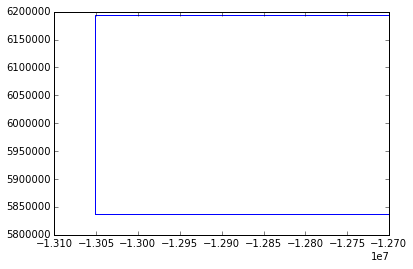

In [2]:
with rasterio.open(input_file) as src:
    print(src.bounds)
    left, bottom, right, top = src.bounds
x = [left, right, right, left, left]
y = [bottom, bottom, top, top, bottom]
plt.plot(x, y)

It would be even better to pull out the coordinates of the oblique rectangle that actually contains data. This file doesn't have masks set, but we could generate mask values with some filtering. See [masks](https://github.com/mapbox/rasterio/blob/master/docs/masks.rst) in the Rasterio documents for examples.

## Part 3

Read each band and combine them into a single NumPy array with the 3rd dimension as the number of bands.

Plot a histogram of the data values for each band (be sure to ignore grid locations with no data).

In [3]:
with rasterio.open(input_file) as src:
    r = src.read(1)
    g = src.read(2)
    b = src.read(3)

# Alternatively, we could have gotten a 3xNxM array
# with src.read() and reshaped
data = np.dstack([r, g, b])
data.shape

(7881, 7771, 3)

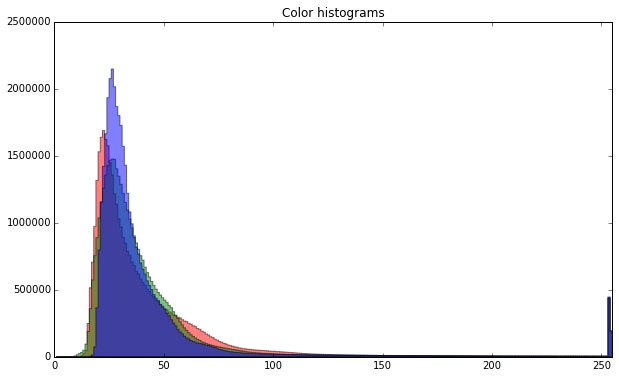

In [4]:
plt.figure(figsize=(10, 6))
for i, color in enumerate(['red', 'green', 'blue']):
    h = plt.hist(data[:,:,i].flat, bins=range(1, 256), color=color, histtype='stepfilled', alpha=0.5)
plt.gca().set_xlim((0, 255))
plt.title('Color histograms')

# Part 4

Plot the data with `plt.imshow`, assuming the first 3 bands are red, green, and blue, respectively. Take a look at the help for `imshow`. For 3-color images, input values should be either integers between 0 and 255 or floats between 0.0 and 1.0, so normalization will be necessary.

Can you do a better job of normalizing the color values by looking at the histograms you made above?

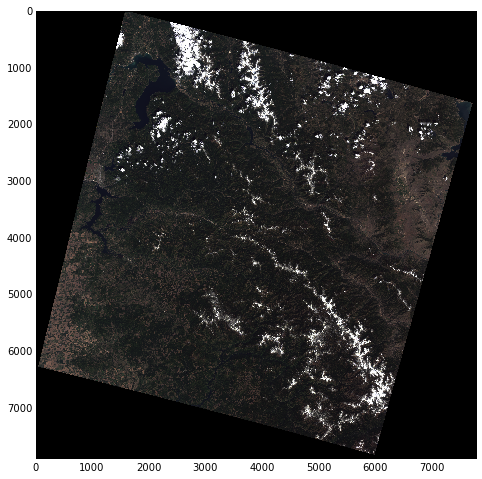

In [5]:
plt.figure(figsize=(8, 8))
plt.imshow(data)